In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
wells = pd.read_csv('/work/Carpe-Datum-2022/Well_Head_and_Completion.csv')
wm = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AI.csv')
wells = wells.merge(wm, how='left', left_on='WELL', right_on='well_id',).drop_duplicates('WELL')
new = pd.read_csv('new_df2.csv')
wells = wells.merge(new, how='left', left_on='WELL', right_on='Unnamed: 0', suffixes=(None,'_y'))
wells['line'] = -.29*wells['Y(ft)']+154670

In [3]:
wells.columns

Index(['WELL', 'X(ft)', 'Y(ft)', 'Completion', 'Elevation Kelly Bushing (ft)',
       'Unnamed: 0', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)', 'RHOB(g/cm3)',
       'DTS(us/ft)', 'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'RS(OHMM)', 'ROP',
       'DENC(g/cm3)', 'NPHI(v/v)', 'Zone', 'well_id', 'X', 'Y',
       'Completion Zone', 'AI_lower(2012-01-01)', 'AI_lower(2021-12-20)',
       'AI_upper(2012-01-01)', 'AI_upper(2021-12-20)', 'Unnamed: 0_y',
       'X(ft)_y', 'Y(ft)_y', 'Completion_y', 'Elevation Kelly Bushing (ft)_y',
       'Sum_Production', 'line'],
      dtype='object')

In [4]:
fig1 = px.scatter(wells, x='Y(ft)', y='X(ft)', hover_name='WELL', color='Completion', width=800, height=800)
fig2 = px.line(wells, x='Y(ft)', y='line', title='Fault Line')
fig = go.Figure(data=fig1.data+fig2.data)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig1.show()

In [5]:
ai = pd.read_csv('Carpe-Datum-2022/AI.csv')

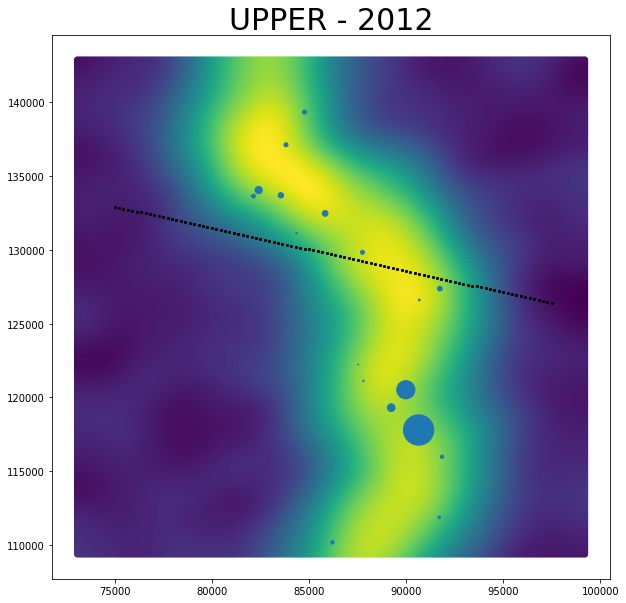

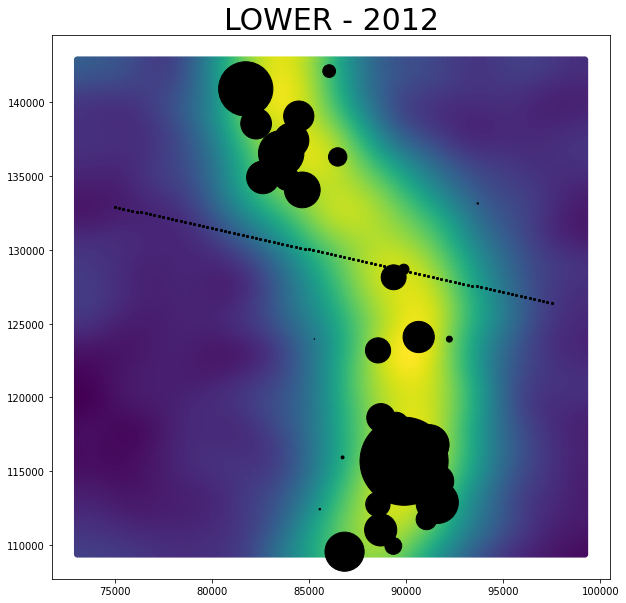

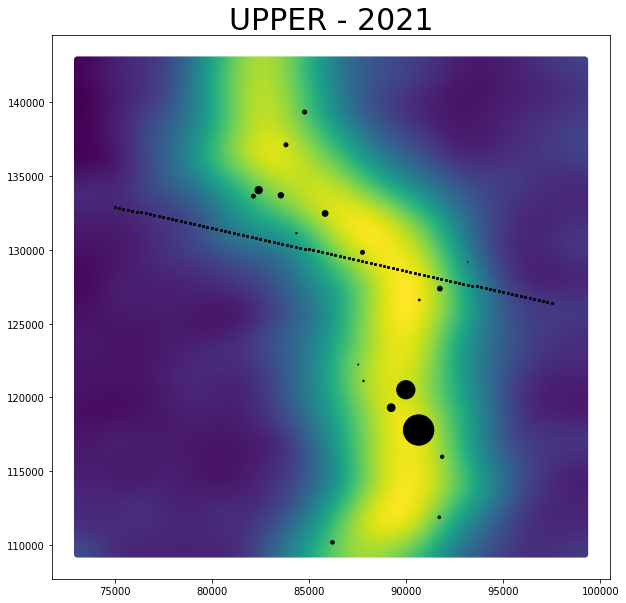

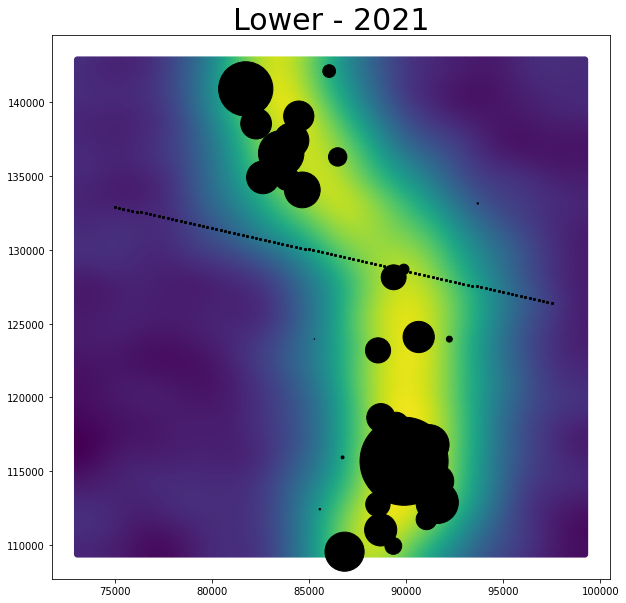

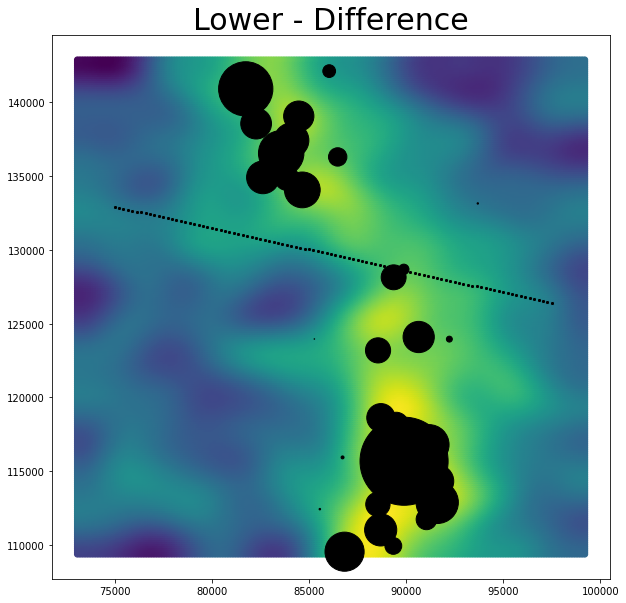

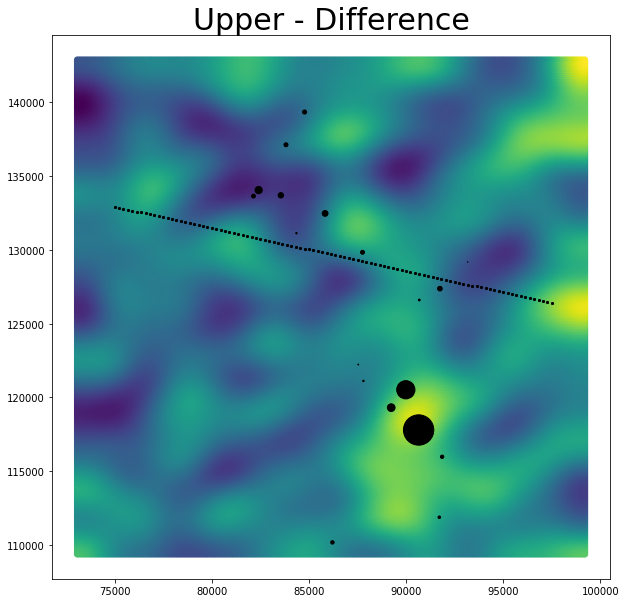

In [9]:
t = np.linspace(75000, 97500, 100)
fault = -.29*t + 154670

fig, ax = plt.subplots(2, 3)

ax[0][0] = plt.figure(figsize=(10,10))
ax[0][0].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_upper(2012-01-01)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][0].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/30,)
ax[0][0].scatter(t, fault, s=5, c='black', marker='x', label='faultline')
ax[0][0].title('UPPER - 2012', fontsize=30)

ax[1][0] = plt.figure(figsize=(10,10))
ax[1][0].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_lower(2012-01-01)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][0].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/30, c='black')
ax[1][0].title('LOWER - 2012', fontsize=30)
ax[1][0].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

ax[0][1] = plt.figure(figsize=(10,10))
ax[0][1].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_upper(2021-12-20)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][1].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/30, c='black')
ax[0][1].title('UPPER - 2021', fontsize=30)
ax[0][1].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

ax[1][1] = plt.figure(figsize=(10,10))
ax[1][1].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_lower(2021-12-20)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][1].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/30, c='black')
ax[1][1].title('Lower - 2021', fontsize=30)
ax[1][1].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

ax[0][2] = plt.figure(figsize=(10,10))
ax[0][0].scatter(ai['Y(ft)'], ai['X(ft)'], c= -ai['AI_lower(2012-01-01)'] + ai['AI_lower(2021-12-20)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[0][0].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/30, c='black')
ax[0][0].title('Lower - Difference', fontsize=30)
plt.show()

ax[0][0] = plt.figure(figsize=(10,10))
plt.scatter(ai['Y(ft)'], ai['X(ft)'], c=-ai['AI_upper(2012-01-01)'] + ai['AI_upper(2021-12-20)'], )
uppers = wells[wells['Completion_x'] == 'Upper']
plt.scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/30, c='black')
plt.title('Upper - Difference', fontsize=30)
plt.show()

In [ ]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),line,Unnamed: 0,MD(ft),PORO(v/v),Permeability(mD),...,NPHI(v/v),Zone,well_id,X,Y,Completion Zone,AI_lower(2012-01-01),AI_lower(2021-12-20),AI_upper(2012-01-01),AI_upper(2021-12-20)
0,WP0,137106.82,83818.47,Upper,193.32,196920.4839,169,4597.471739,NaN,NaN,...,-0.001900,Upper,WP0,137106.82,83818.47,Upper,6557.579122,6634.826845,6530.399584,6527.288321
40,WP1,132460.98,85832.77,Upper,187.15,187594.2749,473,4731.140545,NaN,NaN,...,0.100557,NaN,WP1,132460.98,85832.77,Upper,6539.368495,6609.504274,6522.790055,6523.526063
83,WP2,133634.00,82144.52,Upper,164.55,204670.8724,1228,4687.021905,0.068448,0.010060,...,0.082737,NaN,WP2,133634.00,82144.52,Upper,6449.432465,6489.692810,6474.268628,6454.475167
124,WP3,140892.57,81747.12,Lower,179.92,206510.8344,1875,4734.050184,0.039348,NaN,...,0.071752,Upper,WP3,140892.57,81747.12,Lower,6518.878750,6586.112456,6490.674049,6505.034668
169,WP4,109951.43,89343.45,Lower,186.21,171339.8265,1920,4372.429384,NaN,NaN,...,0.115635,Upper,WP4,109951.43,89343.45,Lower,6520.969109,6611.813169,6497.152926,6500.953741
212,WP5,123950.95,92227.31,Lower,172.80,157987.5547,1188,4602.662001,NaN,NaN,...,0.045719,Upper,WP5,123950.95,92227.31,Lower,6515.812070,6582.968019,6457.752297,6450.780934
252,WP6,111035.32,88692.32,Lower,182.66,174354.5584,557,4369.447677,NaN,NaN,...,-0.001900,Upper,WP6,111035.32,88692.32,Lower,6543.452650,6647.156891,6514.925925,6529.617078
297,WP7,112439.69,85560.85,Lower,181.09,188853.2645,145,4434.485528,0.046906,NaN,...,0.130094,Upper,WP7,112439.69,85560.85,Lower,6438.783226,6486.432395,6403.508051,6400.975613
321,WP8,127369.74,91739.99,Upper,180.04,160243.8463,602,4665.319132,NaN,NaN,...,0.092250,Upper,WP8,127369.74,91739.99,Upper,6536.424734,6600.354460,6501.718771,6500.158650
364,WP9,115943.69,86730.44,Lower,178.25,183438.0628,105,4593.035411,NaN,NaN,...,0.102554,Upper,WP9,115943.69,86730.44,Lower,6457.397617,6510.109098,6411.997249,6423.840537


In [ ]:
wells

In [ ]:
for well in wm['well_id'].unique():
    w = wells[wells['WELL'] == well]
    x = w['X(ft)'].iloc[0]
    y = w['Y(ft)'].iloc[0]
    min_dist = 9999999999
    min_loc = 0
    for i, pt in enumerate(ai.iterrows()):
        dist = np.linalg.norm(np.array([x,y]) - np.array([pt[1]['X(ft)'], pt[1]['Y(ft)']]))
        if dist < min_dist:
            min_loc = i
            min_dist = dist

    wells.loc[wells['WELL']==well, 'AI_lower(2012-01-01)'] = ai.iloc[min_loc]['AI_lower(2012-01-01)']
    wells.loc[wells['WELL']==well, 'AI_lower(2021-12-20)'] = ai.iloc[min_loc]['AI_lower(2021-12-20)']
    wells.loc[wells['WELL']==well, 'AI_upper(2012-01-01)'] = ai.iloc[min_loc]['AI_upper(2012-01-01)']
    wells.loc[wells['WELL']==well, 'AI_upper(2021-12-20)'] = ai.iloc[min_loc]['AI_upper(2021-12-20)']
    wells.loc[wells['WELL']==well, 'nearest AI X(ft)'] = ai.iloc[min_loc]['X(ft)']
    wells.loc[wells['WELL']==well, 'nearest AI Y(ft)'] = ai.iloc[min_loc]['Y(ft)']
    
    #ai_local = ai[(ai['X(ft)'] == x) & (ai['Y(ft)'] == y)]

    #print(ai_local)

In [ ]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),line,AI_lower(2012-01-01),AI_lower(2021-12-20),AI_upper(2012-01-01),AI_upper(2021-12-20),nearest AI X(ft),nearest AI Y(ft)
0,WP0,137106.82,83818.47,Upper,193.32,196920.4839,6557.579122,6634.826845,6530.399584,6527.288321,137081.04,83843.36
1,WP1,132460.98,85832.77,Upper,187.15,187594.2749,6539.368495,6609.504274,6522.790055,6523.526063,132489.04,85811.36
2,WP2,133634.00,82144.52,Upper,164.55,204670.8724,6449.432465,6489.692810,6474.268628,6454.475167,133669.84,82137.76
3,WP3,140892.57,81747.12,Lower,179.92,206510.8344,6518.878750,6586.112456,6490.674049,6505.034668,140885.84,81744.16
4,WP4,109951.43,89343.45,Lower,186.21,171339.8265,6520.969109,6611.813169,6497.152926,6500.953741,109922.64,89353.76
5,WP5,123950.95,92227.31,Lower,172.80,157987.5547,6515.812070,6582.968019,6457.752297,6450.780934,123961.04,92240.16
6,WP6,111035.32,88692.32,Lower,182.66,174354.5584,6543.452650,6647.156891,6514.925925,6529.617078,110972.24,88697.76
7,WP7,112439.69,85560.85,Lower,181.09,188853.2645,6438.783226,6486.432395,6403.508051,6400.975613,112415.44,85548.96
8,WP8,127369.74,91739.99,Upper,180.04,160243.8463,6536.424734,6600.354460,6501.718771,6500.158650,127372.24,91715.36
9,WP9,115943.69,86730.44,Lower,178.25,183438.0628,6457.397617,6510.109098,6411.997249,6423.840537,115957.84,86729.76


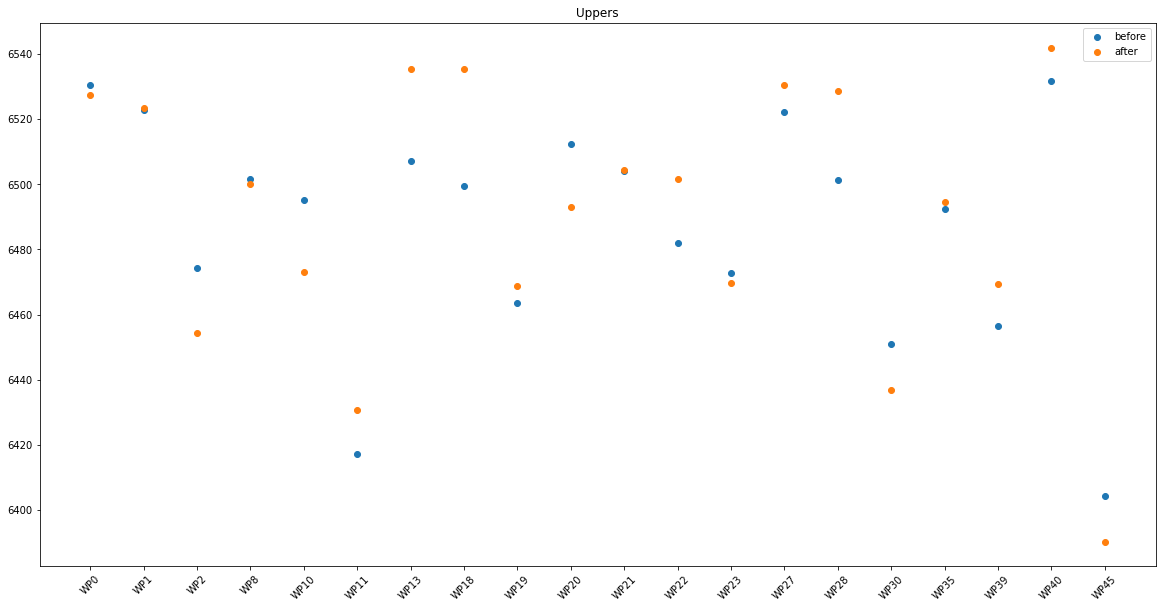

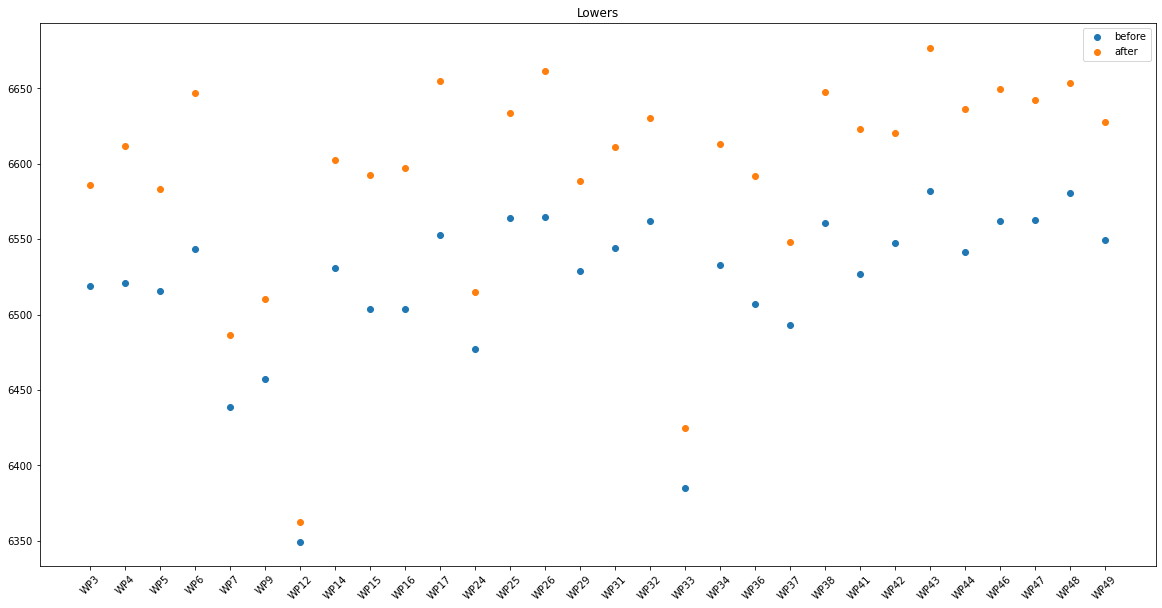

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Uppers')
u = wells[wells['Completion'] == 'Upper']
plt.scatter(u['WELL'], u['AI_upper(2012-01-01)'], label='before')
plt.scatter(u['WELL'], u['AI_upper(2021-12-20)'], label='after')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.title('Lowers')
l = wells[wells['Completion'] == 'Lower']
plt.scatter(l['WELL'], l['AI_lower(2012-01-01)'], label='before')
plt.scatter(l['WELL'], l['AI_lower(2021-12-20)'], label='after')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
for well in wm['well_id'].unique():
    wm.loc[wm['well_id']==well, 'AI_lower(2012-01-01)'] = wells.loc[wells['WELL']==well, 'AI_lower(2012-01-01)'].iloc[0]
    wm.loc[wm['well_id']==well, 'AI_lower(2021-12-20)'] = wells.loc[wells['WELL']==well, 'AI_lower(2021-12-20)'].iloc[0]
    wm.loc[wm['well_id']==well, 'AI_upper(2012-01-01)'] = wells.loc[wells['WELL']==well, 'AI_upper(2012-01-01)'].iloc[0]
    wm.loc[wm['well_id']==well, 'AI_upper(2021-12-20)'] = wells.loc[wells['WELL']==well, 'AI_upper(2021-12-20)'].iloc[0]

In [ ]:
wm.to_csv('Carpe-Datum-2022/Well_Log/WELL_MASTER_AI.csv')

In [ ]:
ai[(ai['X(ft)']==112415.44) & (ai['Y(ft)']==85548.95999999999)]

,X(ft),Y(ft),AI_lower(2012-01-01),AI_upper(2012-01-01),AI_lower(2021-12-20),AI_upper(2021-12-20)
4704,112415.44,85548.96,6438.783226,6403.508051,6486.432395,6400.975613


In [ ]:
for pt in ai.iterrows():
    print(pt[1])

AI_lower(2012-01-01)      6297.470578
AI_upper(2012-01-01)      6285.239008
AI_lower(2021-12-20)      6280.966257
AI_upper(2021-12-20)      6305.771121
Name: 796, dtype: float64
X(ft)                   109791.440000
Y(ft)                    73347.360000
AI_lower(2012-01-01)      6297.830303
AI_upper(2012-01-01)      6286.163096
AI_lower(2021-12-20)      6281.432762
AI_upper(2021-12-20)      6307.373057
Name: 797, dtype: float64
X(ft)                   109791.440000
Y(ft)                    73216.160000
AI_lower(2012-01-01)      6298.209241
AI_upper(2012-01-01)      6287.119828
AI_lower(2021-12-20)      6281.871408
AI_upper(2021-12-20)      6308.745330
Name: 798, dtype: float64
X(ft)                   109791.440000
Y(ft)                    73084.960000
AI_lower(2012-01-01)      6298.606636
AI_upper(2012-01-01)      6288.111141
AI_lower(2021-12-20)      6282.289104
AI_upper(2021-12-20)      6309.875600
Name: 799, dtype: float64
X(ft)                   109922.640000
Y(ft)                 

KeyboardInterrupt: 

In [ ]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),line
0,WP0,137106.82,83818.47,Upper,193.32,196920.4839
1,WP1,132460.98,85832.77,Upper,187.15,187594.2749
2,WP2,133634.00,82144.52,Upper,164.55,204670.8724
3,WP3,140892.57,81747.12,Lower,179.92,206510.8344
4,WP4,109951.43,89343.45,Lower,186.21,171339.8265
5,WP5,123950.95,92227.31,Lower,172.80,157987.5547
6,WP6,111035.32,88692.32,Lower,182.66,174354.5584
7,WP7,112439.69,85560.85,Lower,181.09,188853.2645
8,WP8,127369.74,91739.99,Upper,180.04,160243.8463
9,WP9,115943.69,86730.44,Lower,178.25,183438.0628


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b71fecc-b405-4b93-bce3-c5ed6c21c449' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>